In [15]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")

print("Dataset shape:", df.shape)
df.head()



Dataset shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
df['label'] = df['sentiment'].map({
    'positive': 1,
    'negative': 0
})

df[['sentiment', 'label']].head()


,sentiment,label
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return vader.polarity_scores(text)['compound']

df['vader'] = df['review'].apply(get_vader_score)

df.head()


,review,sentiment,label,vader
0,One of the other reviewers has mentioned that ...,positive,1,-0.9916
1,A wonderful little production. <br /><br />The...,positive,1,0.9670
2,I thought this was a wonderful way to spend ti...,positive,1,0.9519
3,Basically there's a family where a little boy ...,negative,0,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,0.9744


In [11]:
from textblob import TextBlob

def get_textblob_score(text):
    return TextBlob(text).sentiment.polarity

df['textblob'] = df['review'].apply(get_textblob_score)

df.head()


,review,sentiment,label,vader,textblob
0,One of the other reviewers has mentioned that ...,positive,1,-0.9916,0.023433
1,A wonderful little production. <br /><br />The...,positive,1,0.9670,0.109722
2,I thought this was a wonderful way to spend ti...,positive,1,0.9519,0.354008
3,Basically there's a family where a little boy ...,negative,0,-0.9213,-0.057813
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,0.9744,0.217952


In [12]:
import numpy as np

X = df[['vader', 'textblob']].values
y = df['label'].values

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

print("Sample features:", X[:5])
print("Sample labels:", y[:5])


Feature shape: (50000, 2)
Label shape: (50000,)
Sample features: [[-0.9916      0.02343318]
 [ 0.967       0.10972222]
 [ 0.9519      0.35400794]
 [-0.9213     -0.0578125 ]
 [ 0.9744      0.21795225]]
Sample labels: [1 1 1 0 1]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (40000, 2)
Testing samples: (10000, 2)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# input + hidden layer
model.add(Dense(16, activation='relu', input_shape=(2,)))

# hidden layer
model.add(Dense(8, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()


2026-02-15 14:10:28.940979: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2026-02-15 14:10:28.941054: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-15 14:10:28.941083: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2026-02-15 14:10:28.941182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-15 14:10:28.941242: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully")


Model compiled successfully


In [21]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10


2026-02-15 14:11:29.568794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 5s 3ms/step - loss: 0.5321 - accuracy: 0.7383 - val_loss: 0.4860 - val_accuracy: 0.7710
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4879 - accuracy: 0.7660 - val_loss: 0.4850 - val_accuracy: 0.7742
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4878 - accuracy: 0.7666 - val_loss: 0.4898 - val_accuracy: 0.7674
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4880 - accuracy: 0.7666 - val_loss: 0.4850 - val_accuracy: 0.7740
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4880 - accuracy: 0.7665 - val_loss: 0.4847 - val_accuracy: 0.7734
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4883 - accuracy: 0.7670 - val_loss: 0.4855 - val_accuracy: 0.7744
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4884 - accuracy: 0.7665 - val_loss: 0.4854 - val_accuracy: 0.7739
Epo

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.4880 - accuracy: 0.7709
Test Accuracy: 0.7709000110626221


In [23]:
y_pred = model.predict(X_test)

# Convert probabilities to 0 or 1
y_pred = (y_pred > 0.5).astype(int)

print(y_pred[:10])



313/313 [==============================] - 0s 981us/step
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.80      0.78      4961
           1       0.79      0.74      0.77      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



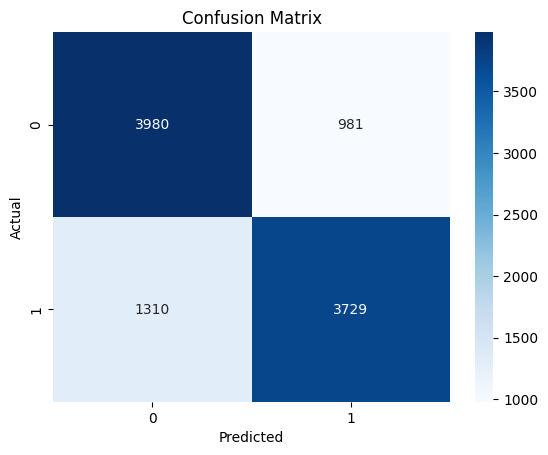

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
model.save("sentiment_mlp_model.h5")

print("Model saved successfully")


Model saved successfully


/Users/cc/Documents/IMDB-Sentiment-MLP/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


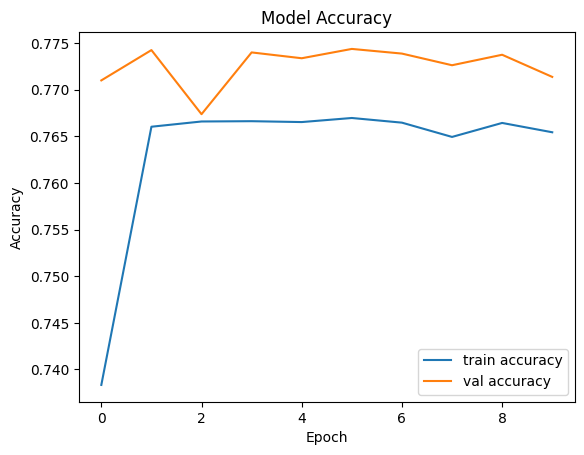

In [27]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
